<a href="https://colab.research.google.com/github/Zakaria-Ibenziane/cic-IDS/blob/main/Cic_IDS_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Modele de detection d'intrusion :*


# ⚒ Importation de data

In [21]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt  ; plt.rcdefaults()
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import time
seconds = time.time()

from scipy import stats
import seaborn as sns

#from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pickle
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None

In [23]:
df1 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv ("OneDrive/Bureau/BCP/DataSet/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [24]:
# df1 = pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# df2=pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
# df3=pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
# df4=pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
# df5=pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
# df6=pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
# df7=pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
# df8=pd.read_csv("/content/drive/MyDrive/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

nRow, nCol = df.shape

print('la taille de notre dataset au debut : ', df.shape)
print('le nombre de lignes duppliquees est : ', df.duplicated().sum())

df =  df.drop_duplicates(keep="first")

print('le nombre de lignes duppliquees apres traitement est : ', df.duplicated().sum())
print('la taille de notre dataset apres traitement des lignes duppliquees devient : ', df.shape)


# df.tail()


la taille de notre dataset au debut :  (2830743, 79)
le nombre de lignes duppliquees est :  308381
le nombre de lignes duppliquees apres traitement est :  0
la taille de notre dataset apres traitement des lignes duppliquees devient :  (2522362, 79)


# ♾ Statistiques

In [25]:
df.rename(columns={' Label': 'Label'}, inplace=True)
df['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

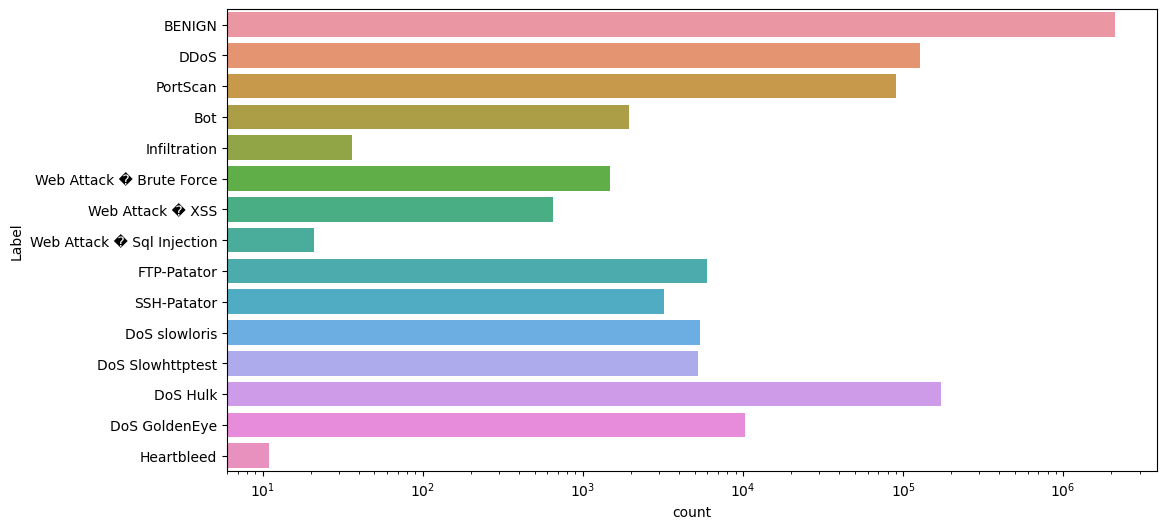

In [26]:
plt.figure(figsize=(12,6))
plot=sns.countplot(data=df['Label'],y=df['Label'].loc[df['Label']!='BEGINE'])
plt.xscale('log')
fig=plot.get_figure()
fig.savefig('label_description.png')

In [28]:
df.Label.value_counts()

Label
normal       2096484
malicious     425878
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

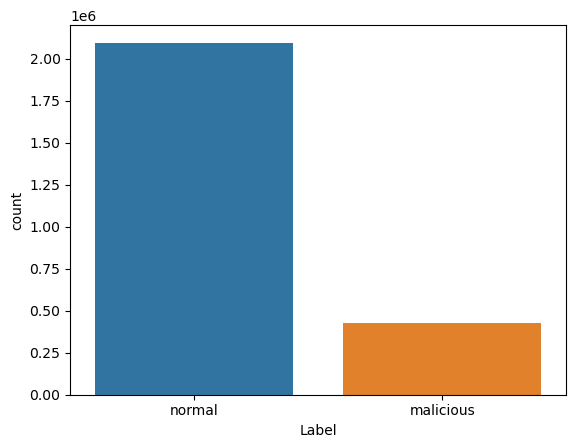

In [27]:
df.Label.value_counts()


# Labeling Benign as normal and all other classes as malicious for binary classification.
df["Label"] = np.where(df["Label"] != "BENIGN", 'malicious','normal')

sns.countplot(data=df,x=df['Label'])

# ⚒ Pretraitement

In [ ]:
from itertools import combinations

def data_cleaning(df):
      df.columns=df.columns.str.strip()
      print("Dataset Shape: ",df.shape)

      num=df._get_numeric_data()
      num[num<0]=0

      zero_variance_cols=[]               # identify and delete columns in a DataFrame (df) that have zero variance (all values are the same)
      for col in df.columns:
          if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
      df.drop(columns=zero_variance_cols, axis=1, inplace=True)
      print("Zero Variance Columns: ", zero_variance_cols, "are dropped.")
      print("Shape after removing the zero varaince columns: ",df.shape)

      df.replace([np.inf,-np.inf],np.nan,inplace=True)
      print(df.isna().any(axis=1).sum(),"rows dropped")
      df.dropna(inplace=True)
      print("Shape after Removing NaN: ",df.shape)

      df.drop_duplicates(inplace=True)
      print("Shape after dropping duplicates: ",df.shape)

      column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
      ide_cols=[]
      for col_pair in column_pairs:
          ide_cols.append(col_pair[1])
      df.drop(columns=ide_cols,axis=1,inplace=True)
      print("Columns which have identical values: ",column_pairs," dropped!")
      print("Shape after removing identical value columns: ",df.shape)

      return df

df=data_cleaning(df)

In [32]:
# from itertools import combinations
# column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
# ide_cols=[]
# for col_pair in column_pairs:
#     ide_cols.append(col_pair[1])
# df.drop(columns=ide_cols,axis=1,inplace=True)
# print("Columns which have identical values: ",column_pairs," dropped!")
# print("Shape after removing identical value columns: ",df.shape)

Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd URG Flags', 'CWE Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1')]  dropped!
Shape after removing identical value columns:  (2520798, 66)


In [ ]:
# df.info()

In [33]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',

In [35]:
# List of columns to drop
columns_to_drop= [ ' CWE Flag Count',' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
                   'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
                   ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
                   'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
                   ' Subflow Bwd Packets', ' Subflow Bwd Bytes'  ]

existing_columns = [col for col in columns_to_drop if col in df.columns]

# Dropping specified columns from the DataFrame
pd.df = df.drop(existing_columns, axis=1)
dropped_columns = list(set(existing_columns))  # Find the columns that were dropped

# Displaying dropped columns
print("Columns dropped:")
for col in dropped_columns:
    print(col)

# df.tail()

Columns dropped:


In [36]:
df.isnull().sum().sort_values(ascending = False)

Destination Port               0
Avg Fwd Segment Size           0
Bwd Packets/s                  0
Min Packet Length              0
Max Packet Length              0
Packet Length Mean             0
Packet Length Std              0
Packet Length Variance         0
FIN Flag Count                 0
RST Flag Count                 0
PSH Flag Count                 0
ACK Flag Count                 0
URG Flag Count                 0
ECE Flag Count                 0
Down/Up Ratio                  0
Average Packet Size            0
Avg Bwd Segment Size           0
Flow Duration                  0
Subflow Fwd Bytes              0
Subflow Bwd Bytes              0
Init_Win_bytes_forward         0
Init_Win_bytes_backward        0
act_data_pkt_fwd               0
min_seg_size_forward           0
Active Mean                    0
Active Std                     0
Active Max                     0
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max  

In [37]:
# Converting categorical values of 'Timestamp' and 'Label' to numerical values.
le = LabelEncoder()
df['Label']=le.fit_transform(df['Label'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520798 entries, 0 to 692702
Data columns (total 66 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [40]:
# Checking for large values.
print(False in np.isfinite(df).values)

False


In [41]:
# Statistical description of the dataset.
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,9.749726e+02,4.315945e+01,3.406225e+02,3.765453e+02,1.411175e+06,4.737320e+04,1.446142e+06,3.278153e+06,1.029948e+07,1.704214e+05,1.625184e+07,2.919257e+06,3.668641e+06,1.014294e+07,1.135671e+06,1.111025e+07,2.027734e+06,1.668681e+06,5.260619e+06,1.086111e+06,4.866832e-02,3.173598e-05,2.503860e+02,2.733500e+02,4.085969e+04,6.513513e+03,1.683200e+01,1.063750e+03,1.906548e+02,3.302006e+02,5.457761e+05,3.209539e-02,2.721360e-04,2.976085e-01,3.118723e-01,1.013929e-01,2.733261e-04,7.004476e-01,2.124358e+02,6.350497e+01,3.406225e+02,6.119359e+02,1.814402e+04,7.265976e+03,2.229208e+03,6.009478e+00,2.588550e+01,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06,8.311086e-01
std,1.901280e+04,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,2.038347e+03,7.087972e+01,6.325636e+02,8.810547e+02,2.656997e+07,2.022194e+05,4.683197e+06,8.456754e+06,2.568537e+07,3.014304e+06,3.516638e+07,1.001639e+07,1.014208e+07,2.576650e+07,9.059498e+06,3.022924e+07,9.393386e+06,6.630315e+06,1.810168e+07,8.797215e+06,2.151737e-01,5.633382e-03,1.660853e+04,2.117853e+04,1.932655e+05,3.814460e+04,2.558415e+01,2.121693e+03,3.183562e+02,6.608889e+02,1.736478e+06,1.762535e-01,1.649430e-02,4.572065e-01,4.632581e-01,3.018483e-01,1.653032e-02,6.956600e-01,3.455032e+02,1.955526e+02,6.325636e+02,1.057394e+04,2.398145e+06,1.459777e+04,8.924281e+03,6.744150e+02,6.525341e+00,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07,3.746560e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000


# ⚛ Transformation de données

In [42]:
x = df.drop(['Label'] , axis = 1).values
y = df['Label'].values

In [43]:
# scaling the dataset / redimensionnement

# ro_scaler = RobustScaler()
# x_scaled = ro_scaler.fit_transform(x)

# échelonnage des données dans une plage donnée, par défaut entre 0 et 1
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_scaled)

In [44]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size= 0.3 , random_state=42)

In [45]:
print('la taille de notre dataset de trainning : ',x_train.shape)
print('la taille de notre dataset de test : ',x_test.shape)

la taille de notre dataset de trainning :  (1764558, 65)
la taille de notre dataset de test :  (756240, 65)


In [46]:
def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)

    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)

    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    # precision, recall , f1score , accuracy
    report=classification_report(y_test,y_pred)
    print(report)

# ☣ Random Forest

In [47]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy  = np.copy(x_test)
y_testcpy  = np.copy(y_test)

# le modèle va entraîner 10 arbres de décision et les agréger pour prendre des décisions
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print(' Random Forest Performance on the test set : Cross Validation Score = %0.4f ' % random_cross)

 Random Forest Performance on the test set : Cross Validation Score = 0.9987 


In [48]:
y_pred = random.predict(x_testcpy)
print("Accuracy: ", accuracy_score(y_testcpy, y_pred))

Accuracy:  0.9988892415106315


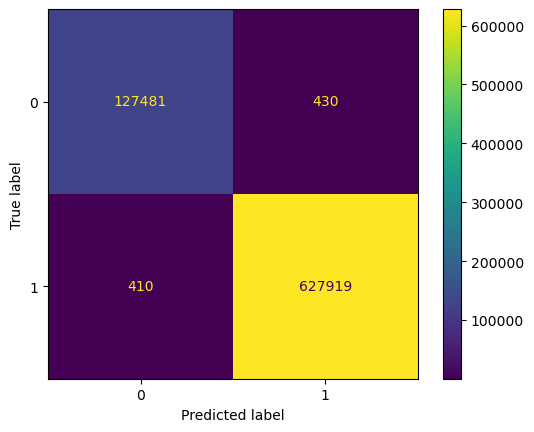

In [49]:
cm = confusion_matrix(y_testcpy, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

# ▶ Fichier PKL du modele

In [50]:
modele = 'modele.pkl'
with open(modele, 'wb') as fichier:
    pickle.dump(random, fichier)
    print("Modèle sauvegardé avec succès dans model.pkl")



Modèle sauvegardé avec succès dans model.pkl
